In [243]:
# HW 1

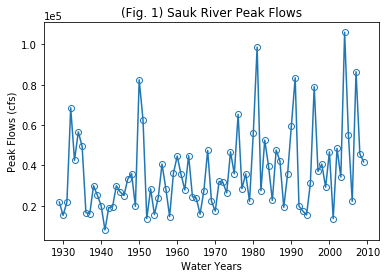

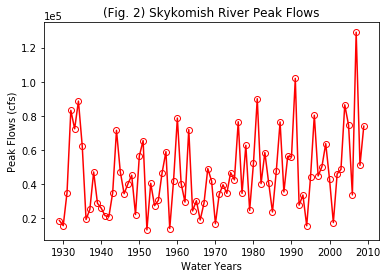

In [244]:
# Problem 1,A

# To read .xlsx file
import xlrd
# To plot
import matplotlib.pyplot as plt

# Define locations of .xlsx files
Sauk_Data = ('Sauk_peak_WY1929_2017.xlsx')
Skykomish_Data = ('Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx')

# Create workbooks and sheets
Sauk_wb = xlrd.open_workbook(Sauk_Data)
Sauk_Sheet = Sauk_wb.sheet_by_index(0)

Skykomish_wb = xlrd.open_workbook(Skykomish_Data)
Skykomish_Sheet = Skykomish_wb.sheet_by_index(0)

# Create and populate years array, peak values array for each site from 1929-2009
Sauk_Year = []
Sauk_Peak = []
# Sauk has 8 rows of comments before data
for i in range(8,Sauk_Sheet.nrows-8):
    Sauk_Year.append(Sauk_Sheet.cell_value(i,0))
    Sauk_Peak.append(Sauk_Sheet.cell_value(i,2))
    
Skykomish_Year = []
Skykomish_Peak = []
# Skykomish has 1 row of comments 
for j in range(1,Skykomish_Sheet.nrows):
    Skykomish_Year.append(Skykomish_Sheet.cell_value(j,1))
    Skykomish_Peak.append(Skykomish_Sheet.cell_value(j,2))

# Plot data from 1929-2009 for both sites
plt.figure(1)
plt.gcf()
plt.plot(Sauk_Year, Sauk_Peak, '-o', markerfacecolor="None")
plt.xlabel('Water Years')
plt.ylabel('Peak Flows (cfs)')
plt.title('(Fig. 1) Sauk River Peak Flows')
plt.ticklabel_format(axis='x', useOffset=False)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

plt.figure(2)
plt.plot(Skykomish_Year, Skykomish_Peak,'-ro', markerfacecolor="None")
plt.xlabel('Water Years')
plt.ylabel('Peak Flows (cfs)')
plt.title('(Fig. 2) Skykomish River Peak Flows')
plt.ticklabel_format(axis='x', useOffset=False)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

(0, 25)

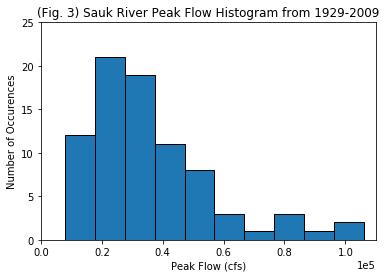

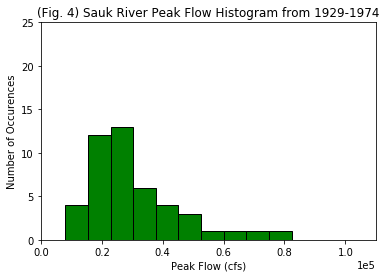

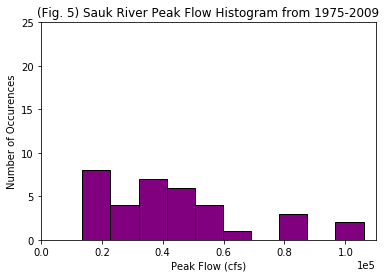

In [245]:
# Problem 1,B,1

# Plot histogram of Sauk peak flow for 1929-2009
nbins = 10
plt.figure(3)
plt.hist(Sauk_Peak, nbins, ec="black")
plt.title('(Fig. 3) Sauk River Peak Flow Histogram from 1929-2009')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlim([0,110000])
plt.ylim([0,25])

# Create new list of data points for period 1 (1929-1974)
Sauk_Peak_1 = []
for i in range(46):
    Sauk_Peak_1.append(Sauk_Peak[i])

# Plot histogram of Sauk peak flow for period 1 (1929-1974)
plt.figure(4)
plt.hist(Sauk_Peak_1, nbins, color = "green", ec="black")
plt.title('(Fig. 4) Sauk River Peak Flow Histogram from 1929-1974')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlim([0,110000])
plt.ylim([0,25])

# Create new list of data points for period 2 (1975-2009)
Sauk_Peak_2 = []
for j in range(46,len(Sauk_Peak)):
    Sauk_Peak_2.append(Sauk_Peak[j])

# Plot histogram of Sauk peak flor for period 2 (1975-2009)
plt.figure(5)
plt.hist(Sauk_Peak_2, nbins, color="purple", ec="black")
plt.title('(Fig. 5) Sauk River Peak Flow Histogram from 1975-2009')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlim([0,110000])
plt.ylim([0,25])

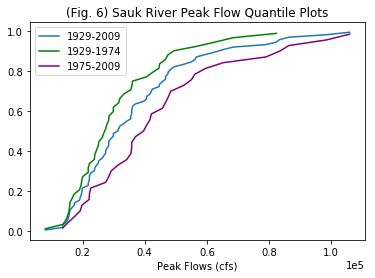

In [246]:
# Problem 1,B,2

# Create ordered data for Quantile plot of entire period
ordered_data = sorted(Sauk_Peak)
n = len(ordered_data)

# Assign rank and plotting position
rank = []
plotting_position = []
for i in range(n):
    rank.append(i+1)
    plotting_position.append((rank[i]-.4)/(n+.2))
    
# Create ordered data for Quantile plot of period 1
ordered_data_1 = sorted(Sauk_Peak_1)
n_1 = len(ordered_data_1)

# Assign rank and plotting position for period 1
rank_1 = []
plotting_position_1 = []
for j in range(n_1):
    rank_1.append(j+1)
    plotting_position_1.append((rank_1[j]-.4)/(n_1+.2))
    
# Create ordered data for Quantile plot of period 2
ordered_data_2 = sorted(Sauk_Peak_2)
n_2 = len(ordered_data_2)

# Assign rank and plotting position for period 2
rank_2 = []
plotting_position_2 = []
for k in range(n_2):
    rank_2.append(k+1)
    plotting_position_2.append((rank_2[k]-.4)/(n_2+.2))
    
# Plot data by plotting position
plt.figure(6)
plt.plot(ordered_data, plotting_position, label='1929-2009')
plt.plot(ordered_data_1, plotting_position_1, color='green', label='1929-1974')
plt.plot(ordered_data_2, plotting_position_2, color='purple', label='1975-2009')
plt.xlabel('Peak Flows (cfs)')
plt.title('(Fig. 6) Sauk River Peak Flow Quantile Plots')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc="best")

In [247]:
# Problem 1,B,3

# Pull counts, bins (gives locations of left sides and the right side of the last bin), and patches from the histogram plots
counts, bins, patches = plt.hist(Sauk_Peak, nbins)
counts_1, bins_1, patches_1 = plt.hist(Sauk_Peak_1, nbins)
counts_2, bins_2, patches_2 = plt.hist(Sauk_Peak_2, nbins)

plt.close()

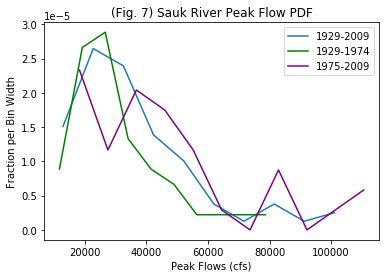

In [248]:
# Problem 1,B,3, continued

# To convert arrays to lists for plotting
import numpy as np

# PDF calculations for Sauk, 1929-2009
width = bins[2]-bins[1]
centers = bins + width/2
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list = np.array(centers).tolist()
centers_list.remove(centers_list[len(centers_list)-1])

# Calculate the area under the curve
areas = [c * width for c in counts]
area_under_curve = sum(areas)

# Calculate the fraction of area vs counts
fractions = [c / area_under_curve for c in counts]

# PDF calculations for Sauk, 1929-1974
width_1 = bins_1[2]-bins_1[1]
centers_1 = bins_1 + width_1/2
centers_list_1 = np.array(centers_1).tolist()
centers_list_1.remove(centers_list_1[len(centers_list_1)-1])

areas_1 = [c * width for c in counts_1]
area_under_curve_1 = sum(areas_1)

fractions_1 = [c / area_under_curve_1 for c in counts_1]

# PDF calculations for Sauk, 1975-2009
width_2 = bins_2[2]-bins_2[1]
centers_2 = bins_2 + width_2/2
centers_list_2 = np.array(centers_2).tolist()
centers_list_2.remove(centers_list_2[len(centers_list_2)-2])

areas_2 = [c * width for c in counts_2]
area_under_curve_2 = sum(areas_2)

fractions_2 = [c / area_under_curve_2 for c in counts_2]

# Set axes, legend
plt.figure(7)
plt.plot(centers_list, fractions, label='1929-2009')
plt.plot(centers_list_1, fractions_1, color="green", label='1929-1974')
plt.plot(centers_list_2, fractions_2, color="purple", label='1975-2009')
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 7) Sauk River Peak Flow PDF')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc="best")

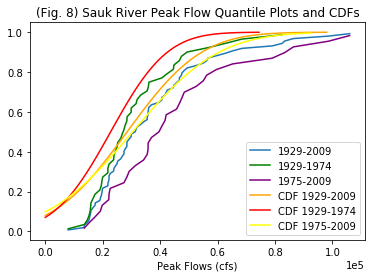

In [249]:
# Problem 1,B,4

import statistics as stats
from scipy.stats import norm

# Calculate mean, sd, x for entire period
mean = stats.mean(Sauk_Peak)
sd = stats.stdev(Sauk_Peak)
num = int(ordered_data[n-1]-ordered_data[0])
x = np.linspace(ordered_data[0], ordered_data[n-1], num)

# Calculate mean, sd, x for period 1
mean_1 = stats.mean(Sauk_Peak_1)
sd_1 = stats.stdev(Sauk_Peak_1)
num_1 = int(ordered_data_1[n_1-1]-ordered_data_1[0])
x_1 = np.linspace(ordered_data_1[0], ordered_data_1[n_1-1], num_1)

# Calculate mean, sd, x for period 2
mean_2 = stats.mean(Sauk_Peak_2)
sd_2 = stats.stdev(Sauk_Peak_2)
num_2 = int(ordered_data_2[n_2-1]-ordered_data_2[0])
x_2 = np.linspace(ordered_data_2[0], ordered_data_2[n_2-1], num_2)

plt.figure(8)
plt.plot(ordered_data, plotting_position, label='1929-2009')
plt.plot(ordered_data_1, plotting_position_1, color='green', label='1929-1974')
plt.plot(ordered_data_2, plotting_position_2, color='purple', label='1975-2009')
plt.plot(norm.cdf(x, mean, sd), color='orange', label='CDF 1929-2009')
plt.plot(norm.cdf(x_1, mean_1, sd_1), color='red', label='CDF 1929-1974')
plt.plot(norm.cdf(x_2, mean_2, sd_2), color='yellow', label='CDF 1975-2009')
plt.xlabel('Peak Flows (cfs)')
plt.title('(Fig. 8) Sauk River Peak Flow Quantile Plots and CDFs')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc="best")

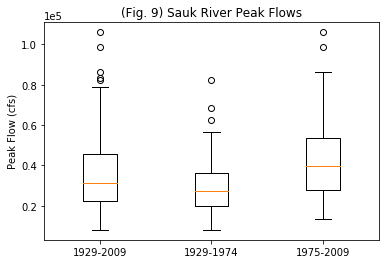

In [250]:
# Problem 1,B,5

# Boxplots for all three periods
fig9, ax = plt.subplots()
data = [Sauk_Peak, Sauk_Peak_1, Sauk_Peak_2]
ax.boxplot(data)
plt.ylabel('Peak Flow (cfs)')
plt.title('(Fig. 9) Sauk River Peak Flows')
plt.xticks([1, 2, 3], ['1929-2009', '1929-1974', '1975-2009'])
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

In [251]:
# Problem 3,A

import math

mean = 60
sd = 35
size = 1000

# For lognormal data
mean_scaled = math.log(mean*mean / math.sqrt(mean*mean + sd*sd))
sd_scaled = math.sqrt(math.log((mean*mean + sd*sd) / (mean*mean)))

# Create data
data_normal = np.random.normal(mean, sd, size)
data_lognormal = np.random.lognormal(mean_scaled, sd_scaled, size)
data_uniform = np.random.uniform(60-35*math.sqrt(3), 60+35*math.sqrt(3), size)

Text(0,0.5,'Number of Occurences')

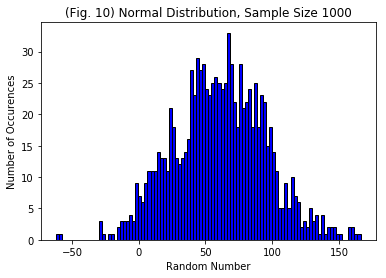

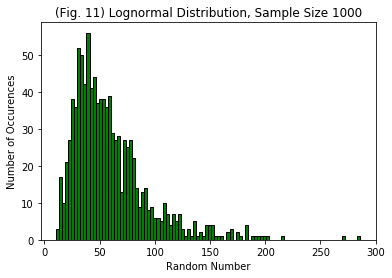

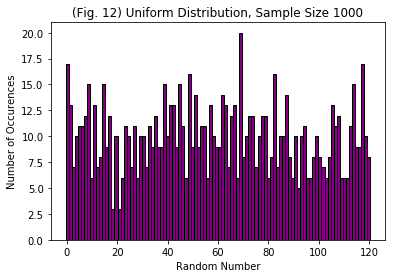

In [252]:
# Problem 3,B (histograms)

# Plot histograms
nbins = 100

# Plot normal
plt.figure(10)
plt.hist(data_normal, nbins, color = "blue", ec="black")
plt.title('(Fig. 10) Normal Distribution, Sample Size 1000')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot lognormal
plt.figure(11)
plt.hist(data_lognormal, nbins, color="green", ec="black")
plt.title('(Fig. 11) Lognormal Distribution, Sample Size 1000')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot uniform
plt.figure(12)
plt.hist(data_uniform, nbins, color = "purple", ec="black")
plt.title('(Fig. 12) Uniform Distribution, Sample Size 1000')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

([<matplotlib.axis.XTick at 0x1d688267b70>,
 <a list of 3 Text xticklabel objects>)

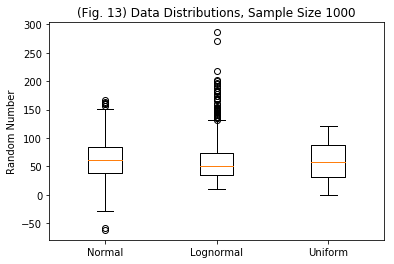

In [253]:
# Problem 3,B, continued (box and whiskers)

#Plot box and whisker plots
fig13, ax = plt.subplots()
data = [data_normal, data_lognormal, data_uniform]
ax.boxplot(data)
plt.ylabel('Random Number')
plt.title('(Fig. 13) Data Distributions, Sample Size 1000')
plt.xticks([1, 2, 3], ['Normal', 'Lognormal', 'Uniform'])

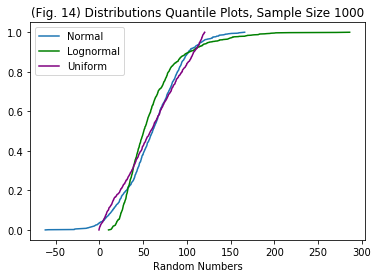

In [254]:
# Problem 3,B continued (Quantile plot)

# Create ordered data for Quantile plot of normal
ordered_data_n = sorted(data_normal)
length_n = len(ordered_data_n)

# Assign rank and plotting position
rank_n = []
plotting_position_n = []
for i in range(length_n):
    rank_n.append(i+1)
    plotting_position_n.append((rank_n[i]-.4)/(length_n+.2))
    
# Create ordered data for Quantile plot of lognormal
ordered_data_ln = sorted(data_lognormal)
length_ln = len(ordered_data_ln)

# Assign rank and plotting position
rank_ln = []
plotting_position_ln = []
for j in range(length_ln):
    rank_ln.append(j+1)
    plotting_position_ln.append((rank_ln[j]-.4)/(length_ln+.2))
    
# Create ordered data for Quantile plot of lognormal
ordered_data_u = sorted(data_uniform)
length_u = len(ordered_data_u)

# Assign rank and plotting position
rank_u = []
plotting_position_u = []
for k in range(length_u):
    rank_u.append(k+1)
    plotting_position_u.append((rank_u[k]-.4)/(length_u+.2))
    
# Plot data by plotting position
plt.figure(14)
plt.plot(ordered_data_n, plotting_position_n, label='Normal')
plt.plot(ordered_data_ln, plotting_position_ln, color='green', label='Lognormal')
plt.plot(ordered_data_u, plotting_position_u, color='purple', label='Uniform')
plt.xlabel('Random Numbers')
plt.title('(Fig. 14) Distributions Quantile Plots, Sample Size 1000')
plt.legend(loc="best")

In [255]:
# Problem 3,B, continued (PDFs)

# Pull counts, bins (gives locations of left sides and the right side of the last bin), and patches from the histogram plots
counts_n, bins_n, patches_n = plt.hist(data_normal, nbins)
counts_ln, bins_ln, patches_ln = plt.hist(data_lognormal, nbins)
counts_u, bins_u, patches_u = plt.hist(data_uniform, nbins)

plt.close()

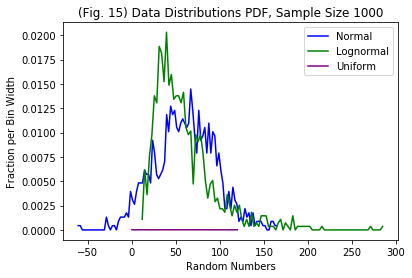

In [256]:
# Problem 3,B, continued (PDFs)

# PDF for normal
width_n = bins_n[2]-bins_n[1]
centers_n = bins_n + width_n/2
centers_list_n = np.array(centers_n).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_n.remove(centers_list_n[len(centers_list_n)-1])

# Calculate the area under the curve
areas_n = [c * width_n for c in counts_n]
area_under_curve_n = sum(areas_n)

# Calculate the fraction of area vs counts
fractions_n = [c / area_under_curve_n for c in counts_n]

# PDF for lognormal
width_ln = bins_ln[2]-bins_ln[1]
centers_ln = bins_ln + width_ln/2
centers_list_ln = np.array(centers_ln).tolist()
# plot.hist() includes the right side of the last bin, which we don't want in the data
centers_list_ln.remove(centers_list_ln[len(centers_list_ln)-1])

# Calculate the area under the curve
areas_ln = [c * width_ln for c in counts_ln]
area_under_curve_ln = sum(areas_ln)

# Calculate the fraction of area vs counts
fractions_ln = [c / area_under_curve_ln for c in counts_ln]

# PDF for uniform
width_u = bins_u[2]-bins_u[1]
centers_u = bins_u + width_u/2
centers_list_u = np.array(centers_u).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_u.remove(centers_list_u[len(centers_list_u)-1])

# Calculate the area under the curve
areas_u = [c * width_u for c in counts_u]
area_under_curve_u = sum(areas_u)

# Calculate the fraction of area vs counts
fractions_u = [c / area_under_curve for c in counts_u]

# Plot PDF
plt.figure(15)
plt.plot(centers_list_n, fractions_n, color="blue", label = 'Normal')
plt.plot(centers_list_ln, fractions_ln, color="green", label = 'Lognormal')
plt.plot(centers_list_u, fractions_u, color="purple", label = 'Uniform')
plt.xlabel('Random Numbers')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 15) Data Distributions PDF, Sample Size 1000')
plt.legend(loc="best")

([<matplotlib.axis.XTick at 0x1d68d0dd2e8>,
 <a list of 3 Text xticklabel objects>)

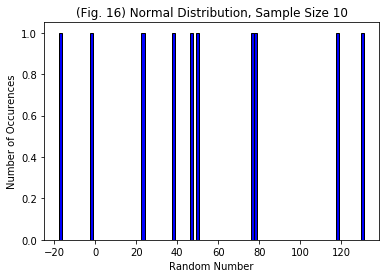

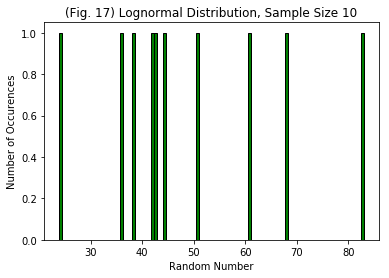

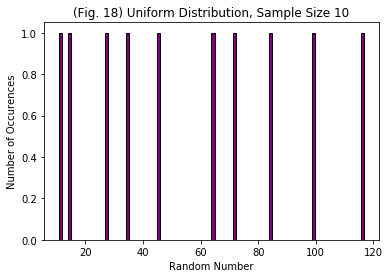

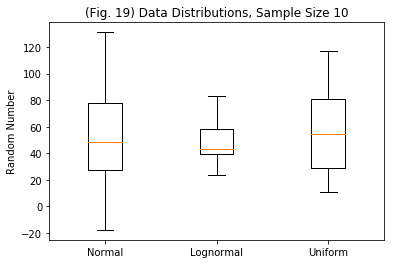

In [257]:
# Problem 3,C (sample size 10; histograms, box and whisker)

# Recreate data
size = 10

data_normal = np.random.normal(mean, sd, size)
data_lognormal = np.random.lognormal(mean_scaled, sd_scaled, size)
data_uniform = np.random.uniform(60-35*math.sqrt(3), 60+35*math.sqrt(3), size)

# Plot histograms
nbins = 100

# Plot normal
plt.figure(16)
plt.hist(data_normal, nbins, color = "blue", ec="black")
plt.title('(Fig. 16) Normal Distribution, Sample Size 10')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot lognormal
plt.figure(17)
plt.hist(data_lognormal, nbins, color="green", ec="black")
plt.title('(Fig. 17) Lognormal Distribution, Sample Size 10')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot uniform
plt.figure(18)
plt.hist(data_uniform, nbins, color = "purple", ec="black")
plt.title('(Fig. 18) Uniform Distribution, Sample Size 10')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

#Plot box and whisker plots
fig19, ax = plt.subplots()
data = [data_normal, data_lognormal, data_uniform]
ax.boxplot(data)
plt.ylabel('Random Number')
plt.title('(Fig. 19) Data Distributions, Sample Size 10')
plt.xticks([1, 2, 3], ['Normal', 'Lognormal', 'Uniform'])

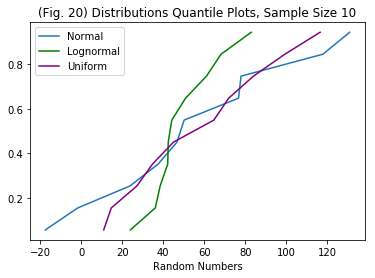

In [258]:
# Problem 3,C continued (sample size 10; quantile plot)

# Create ordered data for Quantile plot of normal
ordered_data_n = sorted(data_normal)
length_n = len(ordered_data_n)

# Assign rank and plotting position
rank_n = []
plotting_position_n = []
for i in range(length_n):
    rank_n.append(i+1)
    plotting_position_n.append((rank_n[i]-.4)/(length_n+.2))
    
# Create ordered data for Quantile plot of lognormal
ordered_data_ln = sorted(data_lognormal)
length_ln = len(ordered_data_ln)

# Assign rank and plotting position
rank_ln = []
plotting_position_ln = []
for j in range(length_ln):
    rank_ln.append(j+1)
    plotting_position_ln.append((rank_ln[j]-.4)/(length_ln+.2))
    
# Create ordered data for Quantile plot of lognormal
ordered_data_u = sorted(data_uniform)
length_u = len(ordered_data_u)

# Assign rank and plotting position
rank_u = []
plotting_position_u = []
for k in range(length_u):
    rank_u.append(k+1)
    plotting_position_u.append((rank_u[k]-.4)/(length_u+.2))
    
# Plot data by plotting position
plt.figure(20)
plt.plot(ordered_data_n, plotting_position_n, label='Normal')
plt.plot(ordered_data_ln, plotting_position_ln, color='green', label='Lognormal')
plt.plot(ordered_data_u, plotting_position_u, color='purple', label='Uniform')
plt.xlabel('Random Numbers')
plt.title('(Fig. 20) Distributions Quantile Plots, Sample Size 10')
plt.legend(loc="best")

In [259]:
# Problem 3,C, continued (sample size 10; PDFs)

# Pull counts, bins (gives locations of left sides and the right side of the last bin), and patches from the histogram plots
counts_n, bins_n, patches_n = plt.hist(data_normal, nbins)
counts_ln, bins_ln, patches_ln = plt.hist(data_lognormal, nbins)
counts_u, bins_u, patches_u = plt.hist(data_uniform, nbins)

plt.close()

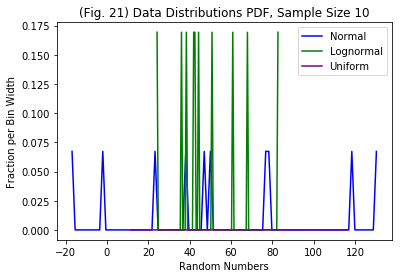

In [260]:
# Problem 3,C, continued (sample size 10; PDFs continued)

# PDF for normal
width_n = bins_n[2]-bins_n[1]
centers_n = bins_n + width_n/2
centers_list_n = np.array(centers_n).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_n.remove(centers_list_n[len(centers_list_n)-1])

# Calculate the area under the curve
areas_n = [c * width_n for c in counts_n]
area_under_curve_n = sum(areas_n)

# Calculate the fraction of area vs counts
fractions_n = [c / area_under_curve_n for c in counts_n]

# PDF for lognormal
width_ln = bins_ln[2]-bins_ln[1]
centers_ln = bins_ln + width_ln/2
centers_list_ln = np.array(centers_ln).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_ln.remove(centers_list_ln[len(centers_list_ln)-1])

# Calculate the area under the curve
areas_ln = [c * width_ln for c in counts_ln]
area_under_curve_ln = sum(areas_ln)

# Calculate the fraction of area vs counts
fractions_ln = [c / area_under_curve_ln for c in counts_ln]

# PDF for uniform
width_u = bins_u[2]-bins_u[1]
centers_u = bins_u + width_u/2
centers_list_u = np.array(centers_u).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_u.remove(centers_list_u[len(centers_list_u)-1])

# Calculate the area under the curve
areas_u = [c * width_u for c in counts_u]
area_under_curve_u = sum(areas_u)

# Calculate the fraction of area vs counts
fractions_u = [c / area_under_curve for c in counts_u]

# Plot PDF
plt.figure(21)
plt.plot(centers_list_n, fractions_n, color="blue", label = 'Normal')
plt.plot(centers_list_ln, fractions_ln, color="green", label = 'Lognormal')
plt.plot(centers_list_u, fractions_u, color="purple", label = 'Uniform')
plt.xlabel('Random Numbers')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 21) Data Distributions PDF, Sample Size 10')
plt.legend(loc="best")

([<matplotlib.axis.XTick at 0x1d690f0b550>,
 <a list of 3 Text xticklabel objects>)

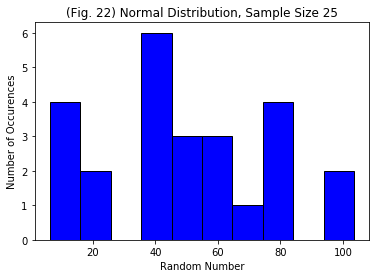

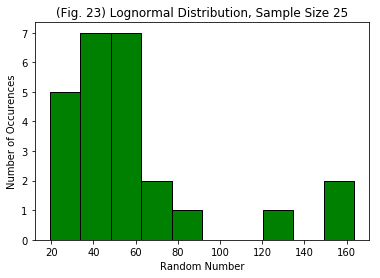

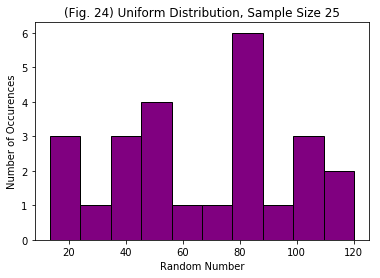

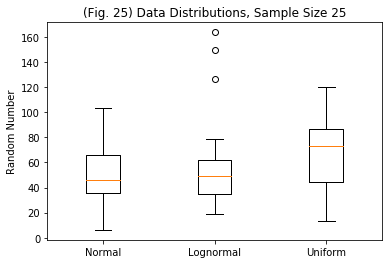

In [261]:
# Problem 3,C, continued (sample size 25; histograms, box and whisker)

# Recreate data
size = 25

data_normal = np.random.normal(mean, sd, size)
data_lognormal = np.random.lognormal(mean_scaled, sd_scaled, size)
data_uniform = np.random.uniform(60-35*math.sqrt(3), 60+35*math.sqrt(3), size)

# Plot histograms
nbins = 10

# Plot normal
plt.figure(22)
plt.hist(data_normal, nbins, color = "blue", ec="black")
plt.title('(Fig. 22) Normal Distribution, Sample Size 25')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot lognormal
plt.figure(23)
plt.hist(data_lognormal, nbins, color="green", ec="black")
plt.title('(Fig. 23) Lognormal Distribution, Sample Size 25')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot uniform
plt.figure(24)
plt.hist(data_uniform, nbins, color = "purple", ec="black")
plt.title('(Fig. 24) Uniform Distribution, Sample Size 25')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

#Plot box and whisker plots
fig25, ax = plt.subplots()
data = [data_normal, data_lognormal, data_uniform]
ax.boxplot(data)
plt.ylabel('Random Number')
plt.title('(Fig. 25) Data Distributions, Sample Size 25')
plt.xticks([1, 2, 3], ['Normal', 'Lognormal', 'Uniform'])

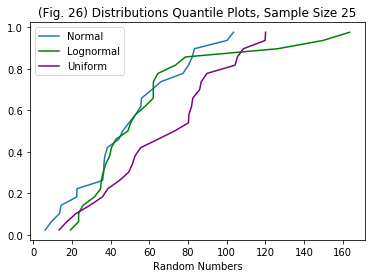

In [262]:
# Problem 3,B continued (sample size 25; quantile)

# Create ordered data for Quantile plot of normal
ordered_data_n = sorted(data_normal)
length_n = len(ordered_data_n)

# Assign rank and plotting position
rank_n = []
plotting_position_n = []
for i in range(length_n):
    rank_n.append(i+1)
    plotting_position_n.append((rank_n[i]-.4)/(length_n+.2))
    
# Create ordered data for Quantile plot of lognormal
ordered_data_ln = sorted(data_lognormal)
length_ln = len(ordered_data_ln)

# Assign rank and plotting position
rank_ln = []
plotting_position_ln = []
for j in range(length_ln):
    rank_ln.append(j+1)
    plotting_position_ln.append((rank_ln[j]-.4)/(length_ln+.2))
    
# Create ordered data for Quantile plot of lognormal
ordered_data_u = sorted(data_uniform)
length_u = len(ordered_data_u)

# Assign rank and plotting position
rank_u = []
plotting_position_u = []
for k in range(length_u):
    rank_u.append(k+1)
    plotting_position_u.append((rank_u[k]-.4)/(length_u+.2))
    
# Plot data by plotting position
plt.figure(26)
plt.plot(ordered_data_n, plotting_position_n, label='Normal')
plt.plot(ordered_data_ln, plotting_position_ln, color='green', label='Lognormal')
plt.plot(ordered_data_u, plotting_position_u, color='purple', label='Uniform')
plt.xlabel('Random Numbers')
plt.title('(Fig. 26) Distributions Quantile Plots, Sample Size 25')
plt.legend(loc="best")

In [263]:
# Problem 3,C, cont (sample size 25; PDFs)

# Pull counts, bins (gives locations of left sides and the right side of the last bin), and patches from the histogram plots
counts_n, bins_n, patches_n = plt.hist(data_normal, nbins)
counts_ln, bins_ln, patches_ln = plt.hist(data_lognormal, nbins)
counts_u, bins_u, patches_u = plt.hist(data_uniform, nbins)

plt.close()

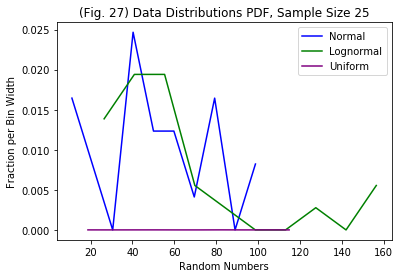

In [264]:
# Problem 3,C, cont (sample size 25; PDFs continued)

# PDF for normal
width_n = bins_n[2]-bins_n[1]
centers_n = bins_n + width_n/2
centers_list_n = np.array(centers_n).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_n.remove(centers_list_n[len(centers_list_n)-1])

# Calculate the area under the curve
areas_n = [c * width_n for c in counts_n]
area_under_curve_n = sum(areas_n)

# Calculate the fraction of area vs counts
fractions_n = [c / area_under_curve_n for c in counts_n]

# PDF for lognormal
width_ln = bins_ln[2]-bins_ln[1]
centers_ln = bins_ln + width_ln/2
centers_list_ln = np.array(centers_ln).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_ln.remove(centers_list_ln[len(centers_list_ln)-1])

# Calculate the area under the curve
areas_ln = [c * width_ln for c in counts_ln]
area_under_curve_ln = sum(areas_ln)

# Calculate the fraction of area vs counts
fractions_ln = [c / area_under_curve_ln for c in counts_ln]

# PDF for uniform
width_u = bins_u[2]-bins_u[1]
centers_u = bins_u + width_u/2
centers_list_u = np.array(centers_u).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_u.remove(centers_list_u[len(centers_list_u)-1])

# Calculate the area under the curve
areas_u = [c * width_u for c in counts_u]
area_under_curve_u = sum(areas_u)

# Calculate the fraction of area vs counts
fractions_u = [c / area_under_curve for c in counts_u]

# Plot PDF
plt.figure(27)
plt.plot(centers_list_n, fractions_n, color="blue", label = 'Normal')
plt.plot(centers_list_ln, fractions_ln, color="green", label = 'Lognormal')
plt.plot(centers_list_u, fractions_u, color="purple", label = 'Uniform')
plt.xlabel('Random Numbers')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 27) Data Distributions PDF, Sample Size 25')
plt.legend(loc="best")

([<matplotlib.axis.XTick at 0x1d685289748>,
 <a list of 3 Text xticklabel objects>)

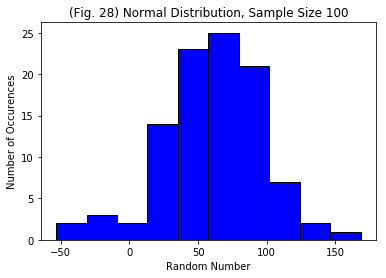

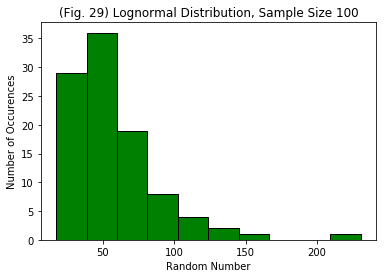

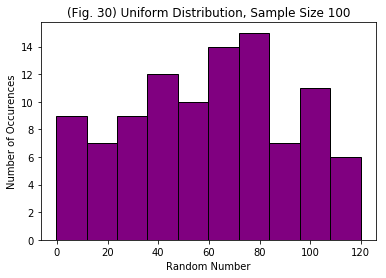

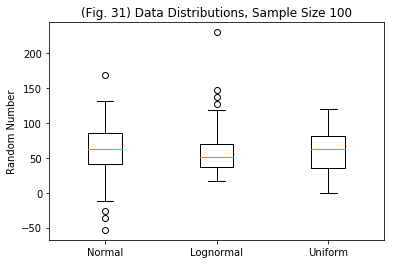

In [265]:
# Problem 3,C, continued (sample size 100; histograms, box and whisker)

# Recreate data
size = 100

data_normal = np.random.normal(mean, sd, size)
data_lognormal = np.random.lognormal(mean_scaled, sd_scaled, size)
data_uniform = np.random.uniform(60-35*math.sqrt(3), 60+35*math.sqrt(3), size)

# Plot histograms
nbins = 10

# Plot normal
plt.figure(28)
plt.hist(data_normal, nbins, color = "blue", ec="black")
plt.title('(Fig. 28) Normal Distribution, Sample Size 100')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot lognormal
plt.figure(29)
plt.hist(data_lognormal, nbins, color="green", ec="black")
plt.title('(Fig. 29) Lognormal Distribution, Sample Size 100')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

# Plot uniform
plt.figure(30)
plt.hist(data_uniform, nbins, color = "purple", ec="black")
plt.title('(Fig. 30) Uniform Distribution, Sample Size 100')
plt.xlabel('Random Number')
plt.ylabel('Number of Occurences')

#Plot box and whisker plots
fig31, ax = plt.subplots()
data = [data_normal, data_lognormal, data_uniform]
ax.boxplot(data)
plt.ylabel('Random Number')
plt.title('(Fig. 31) Data Distributions, Sample Size 100')
plt.xticks([1, 2, 3], ['Normal', 'Lognormal', 'Uniform'])

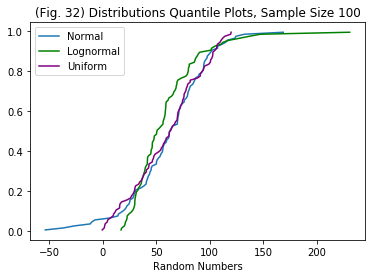

In [266]:
# Problem 3,C continued (sample size 100; quantile plots)

# Create ordered data for Quantile plot of normal
ordered_data_n = sorted(data_normal)
length_n = len(ordered_data_n)

# Assign rank and plotting position
rank_n = []
plotting_position_n = []
for i in range(length_n):
    rank_n.append(i+1)
    plotting_position_n.append((rank_n[i]-.4)/(length_n+.2))
    
# Create ordered data for Quantile plot of lognormal
ordered_data_ln = sorted(data_lognormal)
length_ln = len(ordered_data_ln)

# Assign rank and plotting position
rank_ln = []
plotting_position_ln = []
for j in range(length_ln):
    rank_ln.append(j+1)
    plotting_position_ln.append((rank_ln[j]-.4)/(length_ln+.2))
    
# Create ordered data for Quantile plot of lognormal
ordered_data_u = sorted(data_uniform)
length_u = len(ordered_data_u)

# Assign rank and plotting position
rank_u = []
plotting_position_u = []
for k in range(length_u):
    rank_u.append(k+1)
    plotting_position_u.append((rank_u[k]-.4)/(length_u+.2))
    
# Plot data by plotting position
plt.figure(32)
plt.plot(ordered_data_n, plotting_position_n, label='Normal')
plt.plot(ordered_data_ln, plotting_position_ln, color='green', label='Lognormal')
plt.plot(ordered_data_u, plotting_position_u, color='purple', label='Uniform')
plt.xlabel('Random Numbers')
plt.title('(Fig. 32) Distributions Quantile Plots, Sample Size 100')
plt.legend(loc="best")

In [267]:
# Problem 3,C, continued (sample size 100; PDFs)

# Pull counts, bins (gives locations of left sides and the right side of the last bin), and patches from the histogram plots
counts_n, bins_n, patches_n = plt.hist(data_normal, nbins)
counts_ln, bins_ln, patches_ln = plt.hist(data_lognormal, nbins)
counts_u, bins_u, patches_u = plt.hist(data_uniform, nbins)

plt.close()

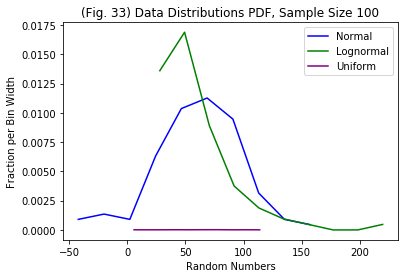

In [268]:
# Problem 3,C, continued (sample size 100; PDFs continued)

# PDF for normal
width_n = bins_n[2]-bins_n[1]
centers_n = bins_n + width_n/2
centers_list_n = np.array(centers_n).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_n.remove(centers_list_n[len(centers_list_n)-1])

# Calculate the area under the curve
areas_n = [c * width_n for c in counts_n]
area_under_curve_n = sum(areas_n)

# Calculate the fraction of area vs counts
fractions_n = [c / area_under_curve_n for c in counts_n]

# PDF for lognormal
width_ln = bins_ln[2]-bins_ln[1]
centers_ln = bins_ln + width_ln/2
centers_list_ln = np.array(centers_ln).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_ln.remove(centers_list_ln[len(centers_list_ln)-1])

# Calculate the area under the curve
areas_ln = [c * width_ln for c in counts_ln]
area_under_curve_ln = sum(areas_ln)

# Calculate the fraction of area vs counts
fractions_ln = [c / area_under_curve_ln for c in counts_ln]

# PDF for uniform
width_u = bins_u[2]-bins_u[1]
centers_u = bins_u + width_u/2
centers_list_u = np.array(centers_u).tolist()
# plt.hist() includes the right side of the last bin, which we don't want in the data
centers_list_u.remove(centers_list_u[len(centers_list_u)-1])

# Calculate the area under the curve
areas_u = [c * width_u for c in counts_u]
area_under_curve_u = sum(areas_u)

# Calculate the fraction of area vs counts
fractions_u = [c / area_under_curve for c in counts_u]

# Plot PDF
plt.figure(33)
plt.plot(centers_list_n, fractions_n, color="blue", label = 'Normal')
plt.plot(centers_list_ln, fractions_ln, color="green", label = 'Lognormal')
plt.plot(centers_list_u, fractions_u, color="purple", label = 'Uniform')
plt.xlabel('Random Numbers')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 33) Data Distributions PDF, Sample Size 100')
plt.legend(loc="best")